In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

## Generowanie danych

In [3]:
n = 150
x = np.linspace(-3, 3, n)
y = x**2 +(3 * np.random.rand(n) - 1.5)

## Przygotowanie środowiska do wykresów

In [4]:
def plt_customization():
    params = {'legend.fontsize': 'xx-large',
              'figure.figsize': (15, 5),
             'axes.labelsize': 'xx-large',
             'axes.titlesize':'xx-large',
             'xtick.labelsize':'xx-large',
             'ytick.labelsize':'xx-large',
             'axes.facecolor':'white'}
    plt.rcParams.update(params)

plt_customization()

## Wizualizacja wygenerowanych danych

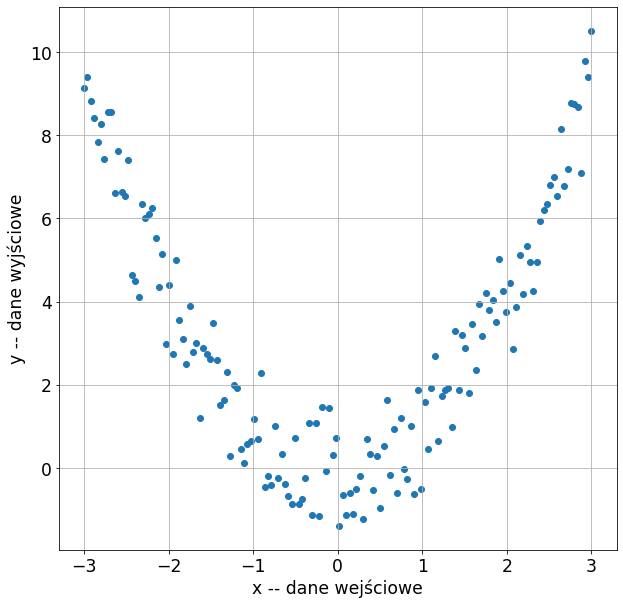

In [5]:
plt.figure(figsize=(10,10),
          facecolor='white')
plt.scatter(x, y)
plt.xlabel('x -- dane wejściowe')
plt.ylabel('y -- dane wyjściowe')
plt.grid()

## Predykcja z wykorzystaniem drzewa decyzyjnego

In [22]:
max_depth = None
min_samples_leaf = 5

X = x.reshape(-1, 1)

model = DecisionTreeRegressor(max_depth=max_depth,
                              min_samples_leaf=min_samples_leaf)
model.fit(X, y)
y_predict = model.predict(X)

## Wizualizacja predykcji

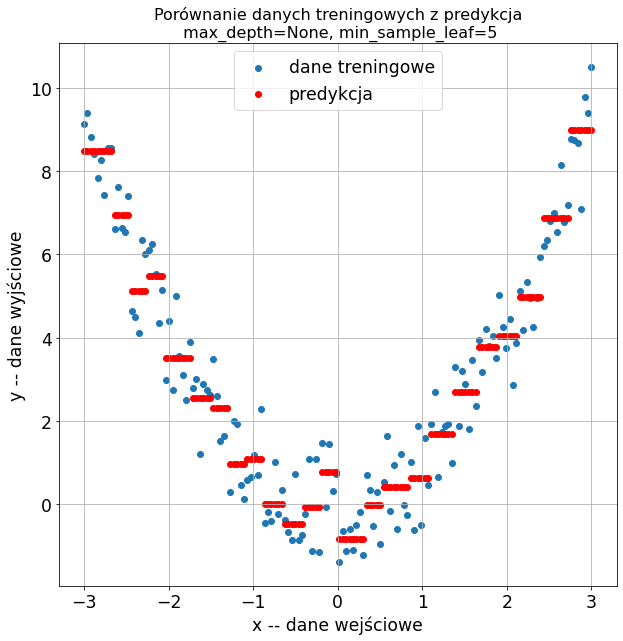

In [23]:
plt.figure(figsize=(10,10), facecolor='white')

plt.scatter(x,y, label='dane treningowe')
plt.scatter(x, y_predict, label='predykcja', color='red')
plt.legend(loc='upper center')
plt.xlabel('x -- dane wejściowe')
plt.ylabel('y -- dane wyjściowe')
plt.title('Porównanie danych treningowych z predykcja\n max_depth={}, min_sample_leaf={}'.format(max_depth, min_samples_leaf),
         fontsize=16)
plt.grid()

# Klasyfikacja

### Wczytanie danych

In [27]:
data = load_iris()

iris = pd.DataFrame(data=np.c_[data['data'],  data.target_names[data.target]],
                   columns=data.feature_names+['target'])
iris[data.feature_names] = iris[data.feature_names].astype(np.float16)

In [31]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.101562,3.500000,1.400391,0.199951,setosa
1,4.898438,3.000000,1.400391,0.199951,setosa
2,4.699219,3.199219,1.299805,0.199951,setosa
3,4.601562,3.099609,1.500000,0.199951,setosa
4,5.000000,3.599609,1.400391,0.199951,setosa
...,...,...,...,...,...
145,6.699219,3.000000,5.199219,2.300781,virginica
146,6.300781,2.500000,5.000000,1.900391,virginica
147,6.500000,3.000000,5.199219,2.000000,virginica
148,6.199219,3.400391,5.398438,2.300781,virginica


### Wizualizacja danych

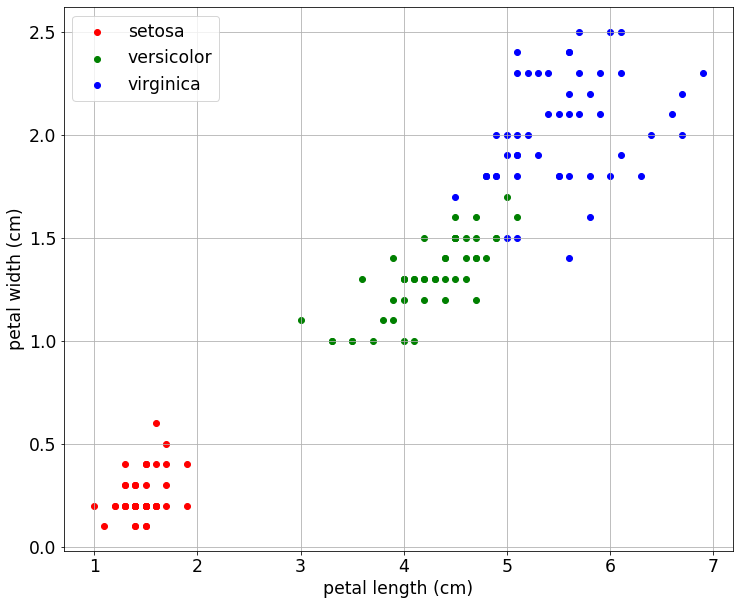

In [28]:
def draw_problem():
    plt.figure(figsize=(12,10), facecolor='white')

    color =  ["red","green","blue"]

    for i in range(0,3):
        iris_part = iris[iris['target']==data.target_names[i]]

        plt.scatter(iris_part[data.feature_names[2]], 
                    iris_part[data.feature_names[3]],
                    color=color[i],
                    label=data.target_names[i])
    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.grid()
    
    return plt

draw_problem();

### Uczenie drzewa decyzyjnego i jego wizualizacja

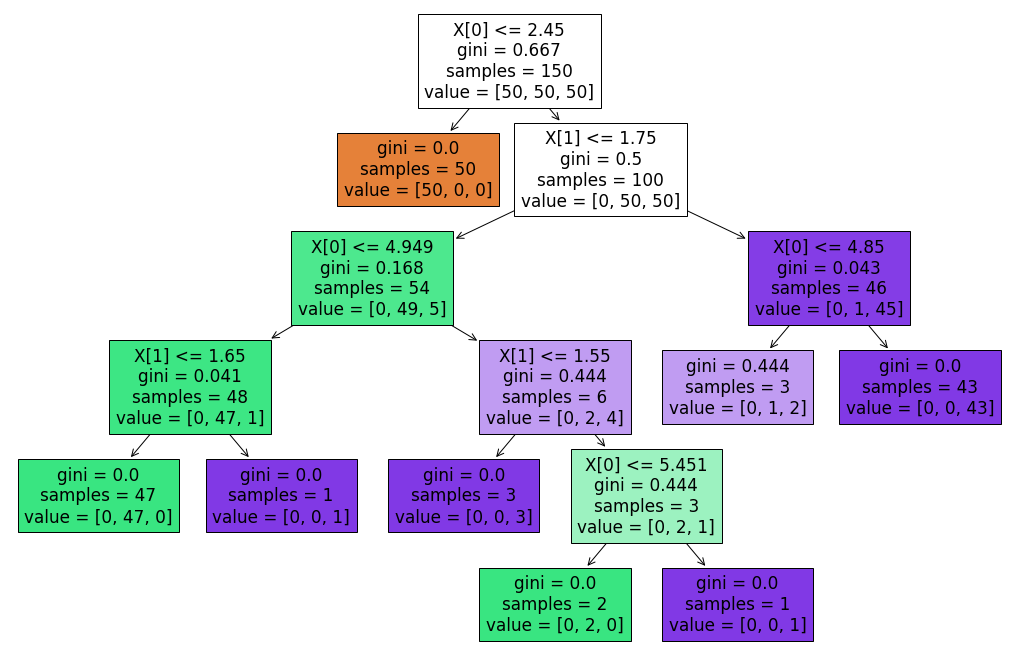

In [30]:
model = DecisionTreeClassifier(criterion='gini',
                               min_samples_leaf=1
                              )

model.fit(iris[[data.feature_names[2], data.feature_names[3]]].values, 
          iris['target'].values
         )

plt.figure(figsize=(18,12), facecolor='white')
plot_tree(model, filled=True);

### Wizualizacja podziału przestrzeni zbioru przez drzewo decyzyjne

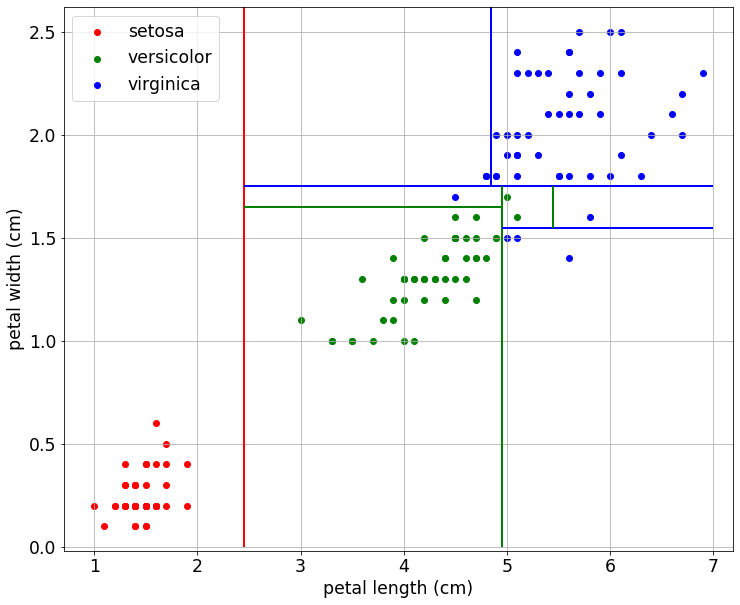

In [32]:
plt = draw_problem();

l1 = [(2.45, 0), (2.45, 2.7)]
l2 = [(2.45, 1.75), (7, 1.75)]
l3 = [(4.949, 0), (4.949, 1.75)]
l4 = [(4.85, 1.75), (4.85, 2.7)]
l5 = [(2.45, 1.65), (4.949, 1.65)]
l6 = [(4.949, 1.55), (7, 1.55)]
l7 = [(5.451, 1.55), (5.451, 1.75)]

lc = LineCollection([l1, l2, l3, l4, l5, l6, l7], 
                    color=["red","blue", 'green', 'blue', 'green', 'blue', 'green'], 
                    lw=2)

plt.gca().add_collection(lc);